# Plot Spectrum with Lifetime plot as an insert

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
# Set figure size
WIDTH = 246.0  # the number (in pt) latex spits out when typing: \the\linewidth  
FACTOR = 0.9   # the fraction of the width you'd like the figure to occupy  
fig_width_pt  = WIDTH * FACTOR

inches_per_pt = 1.0 / 72.27  
golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good

fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches  
fig_height_in = fig_width_in * golden_ratio   # figure height in inches  
fig_dims    = [fig_width_in, fig_height_in] # fig dims as a list

# Update rcParams for figure size
params = {
    'font.size'       : 9.0,
    'text.usetex'     : True,
    'savefig.dpi'     : 1200,
    'savefig.format'  : 'pdf',
    'savefig.bbox'    : 'tight',
    'figure.figsize'  : fig_dims,
   }
plt.rcParams.update(params)

In [3]:
# Lifetime helper function
def model_func(t, a, tau, c):
    """ Model function for a monoexponential decay.
    """
    return a*np.exp(-t/tau)+c

def fit_decay(t, y):
    """ Fit the model monoexponential decay with input data.
        t: time
        y: intensity
        return: [a, tau c]
    """
    from scipy.optimize import curve_fit
    
    try:
        guess = [max(y), 10, min(y)]  # Guess for initial parameters a, tau, c
        popt, pcov = curve_fit(model_func, t, y, guess)
        return popt
    except:
        print('Did not fit a single exp :(')

Lifetime is 12.12 ms


<IPython.core.display.Javascript object>


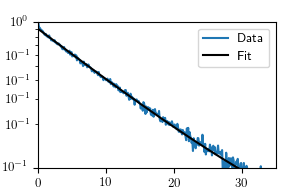

In [4]:
# Lifetime Data
pump = 1    # Pump time (ms)
file = './Air (400mA 1ms).txt'  # File name with lifetime data

# Load data
data = np.genfromtxt(fname=file, delimiter=',', dtype=float, skip_header=11, usecols=(0,1))

time = data[:,0]/1E6  # Convert time from ns to ms
decay = data[:,1]

# Prepare data
decay -= min(decay)    # Subtract background noise
decay /= max(decay)    # Normalise
time -= pump   # Shift time axis to account for the pump

# Drop the data while pump on - *!required for lifetime fitting*!
ind = np.where(time>=0)
time = time[ind]
decay = decay[ind]

# Fit the data and get the lifetime
popt = fit_decay(time, decay)
tau = popt[1]
print('Lifetime is {0:.2f} ms'.format(tau))

# Simulate data with fitting parameters
y_fit = model_func(time, popt[0], tau, popt[2])

# Plot data and fit
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time, decay, label='Data')
ax.plot(time, y_fit, 'k', label='Fit')

ax.set_yscale('log')
plt.ylim(0.1, 1)
plt.xlim(0, 35)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity (A.U.)')
plt.legend()
# plt.savefig('lifetime_T2')

In [5]:
# Spectrum Data
file = './T2.txt'    # File name with spectrum data

# Load Data
data = np.genfromtxt(fname=file, delimiter=',', dtype=float, skip_header=22, usecols=(0,1))
lam = data[:,0]
spectrum = data[:,1]

# Prepare Data
loc = np.where((lam < 1410) | (lam > 1690))
spectrum -= np.mean(spectrum[loc])    # Subtract baseline from tails
spectrum /= max(spectrum)             # Normalise

<IPython.core.display.Javascript object>


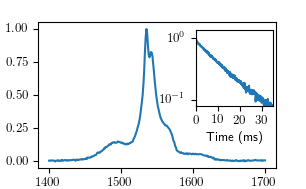

In [34]:
# Plot Data (Main)
fig, ax1 = plt.subplots()
plt.plot(lam, spectrum)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity (A.U.)')
# plt.xlim(right=1750)

# this is another inset axes over the main axes
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [.64, .44, .25, .4]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(time, decay)
ax2.set_yscale('log')
ax2.set_ylim(bottom=0.08)
ax2.set_xlim(0, 35)
ax2.set_xlabel('Time (ms)')
# ax2.set_ylabel('Intensity (A.U.)')
ax2.set_xticks([0, 10, 20, 30])
ax2.minorticks_off()

In [39]:
plt.savefig('spectrum_lifetime_T2')# Plot Spectrum with Lifetime plot as an insert